<a href="https://colab.research.google.com/github/N8uce/CNN-test/blob/main/%D0%94%D0%BE%D0%BA%D0%BB%D0%B0%D0%B4_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.applications import VGG16

# Загрузка предварительно обученной модели VGG16
model = VGG16(weights='imagenet', include_top= False , input_shape=(256, 256, 3))

# Вывод архитектуры модели
model.summary()


58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
from sklearn.model_selection import train_test_split
import os
import glob

# Путь к вашему датасету
dataset_path = '/content/drive/MyDrive/classif/5mammal'

# Получение списка всех файлов
all_files = glob.glob(os.path.join(dataset_path, '*/*'))

# Разделение данных на обучающий и тестовый наборы
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42)


print(f'Количество обучающих файлов: {len(train_files)}')
print(f'Количество тестовых файлов: {len(test_files)}')




Количество обучающих файлов: 1240
Количество тестовых файлов: 310


In [ ]:
import os
import glob
import shutil
from sklearn.model_selection import train_test_split
from collections import Counter

# Путь к вашему датасету
dataset_path = '/content/drive/MyDrive/classif/5mammal'

# Получение списка всех файлов и их классов
all_files = glob.glob(os.path.join(dataset_path, '*/*'))
all_labels = [os.path.basename(os.path.dirname(file)) for file in all_files]

# Разделение данных на обучающий и тестовый наборы с учётом классов
train_files, test_files = train_test_split(all_files, test_size=0.2, random_state=42, stratify=all_labels)

print(f'Количество обучающих файлов: {len(train_files)}')
print(f'Количество тестовых файлов: {len(test_files)}')

# Создание папок
train_dir = '/content/drive/MyDrive/classif/train5'
test_dir = '/content/drive/MyDrive/classif/test5'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Копирование файлов с сохранением структуры классов
for file in train_files:
    destination = file.replace(dataset_path, train_dir)
    os.makedirs(os.path.dirname(destination), exist_ok=True)
    shutil.copy(file, destination)

for file in test_files:
    destination = file.replace(dataset_path, test_dir)
    os.makedirs(os.path.dirname(destination), exist_ok=True)
    shutil.copy(file, destination)

# Проверка баланса классов в обучающем и тестовом наборах
train_labels = [os.path.basename(os.path.dirname(file)) for file in train_files]
test_labels = [os.path.basename(os.path.dirname(file)) for file in test_files]

print('Распределение классов в обучающем наборе:', Counter(train_labels))
print('Распределение классов в тестовом наборе:', Counter(test_labels))


Количество обучающих файлов: 1240
Количество тестовых файлов: 310
Распределение классов в обучающем наборе: Counter({'zebra': 248, 'koala': 248, 'giraffe': 248, 'dolphin': 248, 'tapir': 248})
Распределение классов в тестовом наборе: Counter({'tapir': 62, 'zebra': 62, 'giraffe': 62, 'koala': 62, 'dolphin': 62})


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

num_classes = 5
img_resolution = (256, 256)
batch_size = 64
dataset_dir = '/content/drive/MyDrive/classif/train5'

# Создание генератора изображений
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.125,
    rotation_range=45,  #Диапазон значений для случайного поворота изображений
    shear_range=0.2,  #Интенсивность сдвига
    zoom_range=0.35,  #Интенсивность зума
    horizontal_flip= True, #Cлучайный горизонтальный переворот изображений
)

# Генераторы для обучающего и валидационного наборов
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_resolution,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_resolution,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = tf.keras.models.Sequential([
    #поступает изображение и начинается свёртка + ReLu
    tf.keras.layers.Conv2D(16, (3, 3), padding='same',activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), padding='same',activation='relu'),
    #пуллинг
    tf.keras.layers.MaxPooling2D((2, 2),strides=(2, 2)),
    #свёртка + ReLu
    tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
    Dropout(0.1),
    tf.keras.layers.MaxPooling2D((2, 2),strides=(2, 2)),


    tf.keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    Dropout(0.1),
    tf.keras.layers.MaxPooling2D((2, 2),strides=(2, 2)),

    #Выпрямляющий слой
    tf.keras.layers.Flatten(),

    #полносвязный слой с  нейронами
    tf.keras.layers.Dense(75, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    Dropout(0.35),
    #Выходной слой
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

lt = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate = lt)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Found 1085 images belonging to 5 classes.
Found 155 images belonging to 5 classes.
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 conv2d_85 (Conv2D)          (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_86 (Conv2D)          (None, 128, 128, 64)      9280      
                                                                 
 conv2d_87 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 dropout_42 (Dropout)        (None, 

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights= True)
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
filepath = "/content/drive/MyDrive/classif/model-{epoch:03d}.model"
early_stop = EarlyStopping(monitor='val_loss', patience=15)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
red_lr = ReduceLROnPlateau(monitor = 'val_loss',patience = 5, verbose =1, factor = 0.1, min_lr=0.00000001)
history = model.fit(train_generator, validation_data=validation_generator, epochs=200, callbacks=[red_lr,early_stop])

Epoch 1/200
16/16 [==============================] - 55s 2s/step - loss: 1.6481 - accuracy: 0.2412 - val_loss: 1.4761 - val_accuracy: 0.3061 - lr: 0.0010
Epoch 2/200
16/16 [==============================] - 26s 2s/step - loss: 1.4298 - accuracy: 0.3276 - val_loss: 1.4761 - val_accuracy: 0.3796 - lr: 0.0010
Epoch 3/200
16/16 [==============================] - 26s 2s/step - loss: 1.3465 - accuracy: 0.3719 - val_loss: 1.3000 - val_accuracy: 0.4082 - lr: 0.0010
Epoch 4/200
16/16 [==============================] - 26s 2s/step - loss: 1.2619 - accuracy: 0.4342 - val_loss: 1.2465 - val_accuracy: 0.4776 - lr: 0.0010
Epoch 5/200
16/16 [==============================] - 26s 2s/step - loss: 1.2103 - accuracy: 0.4874 - val_loss: 1.1933 - val_accuracy: 0.4735 - lr: 0.0010
Epoch 6/200
16/16 [==============================] - 25s 2s/step - loss: 1.1973 - accuracy: 0.4754 - val_loss: 1.1535 - val_accuracy: 0.5224 - lr: 0.0010
Epoch 7/200
16/16 [==============================] - 30s 2s/step - loss: 1.1

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

num_classes = 5
img_resolution = (256, 256)
batch_size = 64
dataset_dir = '/content/drive/MyDrive/classif/train5'

# Создание генератора изображений
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15,
    rotation_range=30,  # Диапазон значений для случайного поворота изображений
    shear_range=0.2,  # Интенсивность сдвига
    zoom_range=0.2,  # Интенсивность зума
)


# Генераторы для обучающего и валидационного наборов
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_resolution,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_resolution,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

model = tf.keras.models.Sequential([
    #поступает изображение и начинается свёртка + ReLu
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    #пуллинг
    tf.keras.layers.MaxPooling2D(2, 2),
    #свёртка + ReLu
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.1),
    tf.keras.layers.MaxPooling2D(2, 2),


    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.1),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.1),
    tf.keras.layers.MaxPooling2D(2, 2),
    #Выпрямляющий слой
    tf.keras.layers.Flatten(),
    #полносвязный слой с  нейронами
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(72, activation='relu'),
    Dropout(0.35),
    #Выходной слой
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

lt = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate = lt)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


Found 1190 images belonging to 5 classes.
Found 205 images belonging to 5 classes.


In [ ]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_75 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_76 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 dropout_66 (Dropout)        (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (None, 60, 60, 64)      

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=4)
from keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitor = 'val_loss',patience = 2, verbose =1, factor = 0.1)
history = model.fit(train_generator, validation_data=validation_generator, epochs=300, callbacks=[early_stop, red_lr])

Epoch 1/300
19/19 [==============================] - 36s 2s/step - loss: 1.5174 - accuracy: 0.3437 - val_loss: 1.2807 - val_accuracy: 0.4732 - lr: 0.0010
Epoch 2/300
19/19 [==============================] - 29s 2s/step - loss: 1.1206 - accuracy: 0.5151 - val_loss: 1.0468 - val_accuracy: 0.6146 - lr: 0.0010
Epoch 3/300
19/19 [==============================] - 29s 2s/step - loss: 0.9781 - accuracy: 0.6252 - val_loss: 0.8925 - val_accuracy: 0.6537 - lr: 0.0010
Epoch 4/300
19/19 [==============================] - 29s 2s/step - loss: 0.8878 - accuracy: 0.6622 - val_loss: 0.8113 - val_accuracy: 0.6976 - lr: 0.0010
Epoch 5/300
19/19 [==============================] - 29s 2s/step - loss: 0.7451 - accuracy: 0.7101 - val_loss: 0.7933 - val_accuracy: 0.7171 - lr: 0.0010
Epoch 6/300
19/19 [==============================] - 29s 2s/step - loss: 0.6926 - accuracy: 0.7487 - val_loss: 0.7659 - val_accuracy: 0.7366 - lr: 0.0010
Epoch 7/300
19/19 [==============================] - 29s 2s/step - loss: 0.6

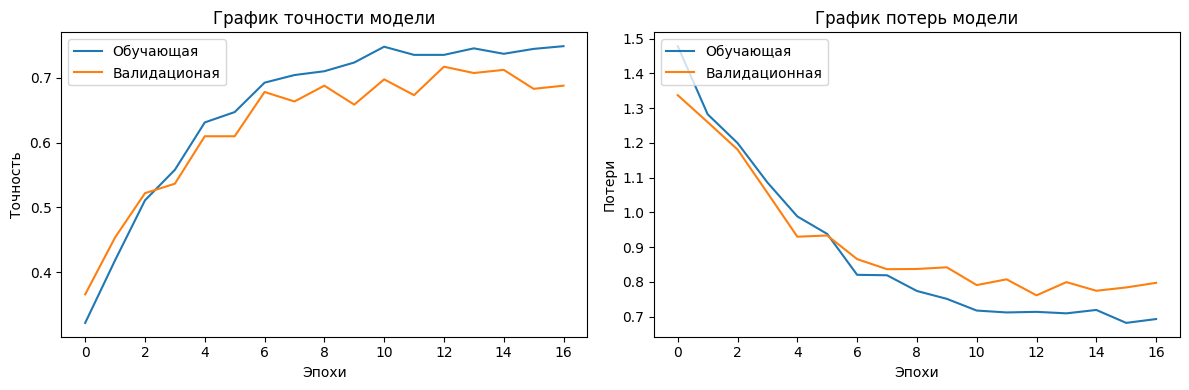

In [ ]:
import matplotlib.pyplot as plt

# Постройте график точности обучения и валидации
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('График точности модели')
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(['Обучающая', 'Валидационая'], loc='upper left')

# Постройте график потерь обучения и валидации
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График потерь модели')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Обучающая', 'Валидационная'], loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
test_dataset_dir = '/content/drive/MyDrive/classif/test5'
img_resolution = (256, 256)

batch_size = 64

# Генератор для тестового набора данных
test_generator = datagen.flow_from_directory(-
    test_dataset_dir,
    target_size=img_resolution,
    batch_size=batch_size,
    class_mode='categorical')

loss, accuracy = model.evaluate(test_generator)
print(f'Точность на тестовом наборе данных: {accuracy*100:.2f}%')

Found 155 images belonging to 5 classes.
3/3 [==============================] - 27s 13s/step - loss: 0.3719 - accuracy: 0.9161
Точность на тестовом наборе данных: 91.61%


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    rotation_range=30,  # Диапазон значений для случайного поворота изображений
    shear_range=0.2,  # Интенсивность сдвига
    zoom_range=0.2,  # Интенсивность зума
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Получение одного батча изображений и меток
images_batch, labels_batch = next(train_generator)

# Отображение первых 5 изображений
for i in range(5):
    plt.imshow(images_batch[i])
    plt.title(np.argmax(labels_batch[i]))  # Заголовок - это класс изображения
    plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_resolution = (256, 256)

batch_size = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    rotation_range=30,  # Диапазон значений для случайного поворота изображений
    shear_range=0.2,  # Интенсивность сдвига
    zoom_range=0.2,  # Интенсивность зума
)
dataset_dir = '/content/drive/MyDrive/classif/train5'
# Генераторы для обучающего и валидационного наборов
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_resolution,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')


Found 1236 images belonging to 5 classes.


In [ ]:
# Сохранение модели
model.save('5classmodel_acu82.h5')

# Загрузка модели на Google Диск
from google.colab import drive
drive.mount('/content/gdrive')

!cp 5classmodel_acu82.h5 /content/gdrive/My\ Drive/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import load_model

model.save('5classmodel_acu80.keras')

!cp 5classmodel_acu80.keras /content/gdrive/My\ Drive/

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/5classmodel_acu80.h5')


In [ ]:
print(train_generator.class_indices)

{'dolphin': 0, 'giraffe': 1, 'koala': 2, 'tapir': 3, 'zebra': 4}


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = '/content/1864473.png'

# Загрузка и предварительная обработка изображения
img = image.load_img(img_path, target_size=img_resolution)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])


print(f'Predicted class: {predicted_class}')

FileNotFoundError: [Errno 2] No such file or directory: '/content/1864473.png'

In [ ]:
test_dataset_dir = '/content/drive/MyDrive/classif/test5'


test_generator = datagen.flow_from_directory(
    test_dataset_dir,
    target_size=img_resolution,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

loss, accuracy = model.evaluate(test_generator)
print(f'Точность на тестовом наборе данных: {accuracy*100:.2f}%')

Found 153 images belonging to 5 classes.
3/3 [==============================] - 30s 13s/step - loss: 0.6247 - accuracy: 0.7974
Точность на тестовом наборе данных: 79.74%


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes

# Создание отчета о классификации
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)


3/3 [==============================] - 8s 2s/step
              precision    recall  f1-score   support

     dolphin       0.91      0.87      0.89        23
     giraffe       0.74      0.71      0.73        28
       koala       0.66      0.72      0.69        29
       tapir       0.73      0.79      0.76        34
       zebra       0.94      0.85      0.89        39

    accuracy                           0.79       153
   macro avg       0.80      0.79      0.79       153
weighted avg       0.80      0.79      0.79       153



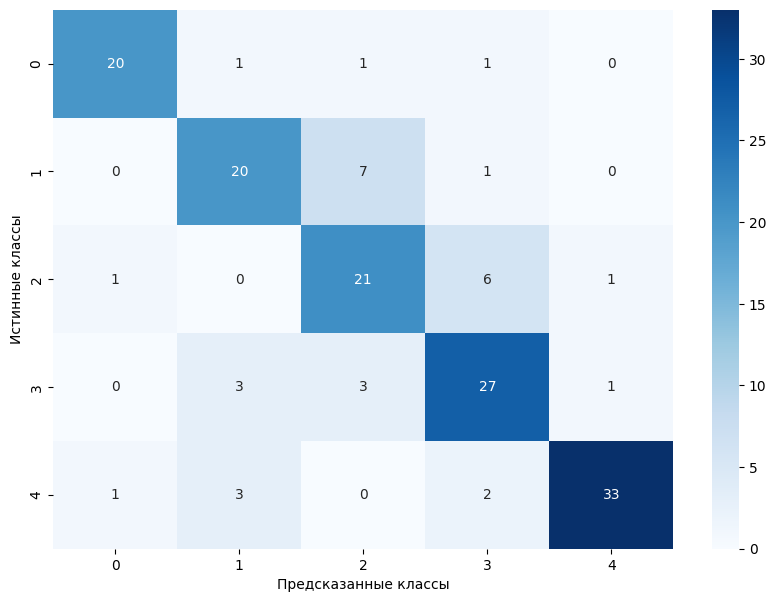

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Создание матрицы ошибок
cm = confusion_matrix(true_classes, predicted_classes)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()
